In [57]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pylab import savefig

sns.set_palette("RdBu_r")

In [58]:
ds = pd.read_csv('../datasets/equake_clean.csv')
ds.head()

,Unnamed: 0,name,equake_near,material type,age of bridge,bridge type,magnitude,d to epicenter in miles,damaged,Damage level
0,0,"San Francisco-Oakland Bay Bridge, 1936","1989, Loma Prieta",I,53,III,6.9,59.9,1,0_0_1
1,1,San Francisco-Oakland Bay Bridge,Northern California,I,57,III,4.7,50.0,0,1_0_0
2,2,San Francisco-Oakland Bay Bridge,Bay Area,I,67,III,4.0,6.9,0,1_0_0
3,3,San Francisco-Oakland Bay Bridge,1km N of Piedmont,I,79,III,4.0,6.3,0,1_0_0
4,4,San Francisco-Oakland Bay Bridge,2km SE of Berkeley,I,82,III,4.4,5.4,0,1_0_0


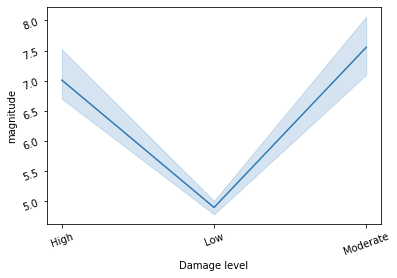

In [59]:
#how much damage sustained at respective magnitude.

ds['Damage level'] = ds['Damage level'].replace('0_0_1', 'High')
ds['Damage level'] = ds['Damage level'].replace('0_1_0', 'Moderate')
ds['Damage level'] = ds['Damage level'].replace('1_0_0', 'Low')

sns_plot = sns.lineplot(data=ds, x="Damage level", y="magnitude")
plt.tick_params(labelrotation = 20)
figure = sns_plot.get_figure() 
figure.savefig("../Outputs/output1.png", dpi = 1000)

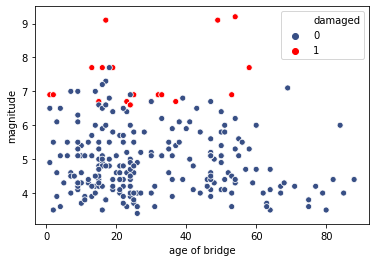

In [60]:
#damage sustained by the older bridge and bridges which have recently been made.  
hue_colors = { 0: "#384f85", 1: "red"}

sns_plot = sns.scatterplot(ds['age of bridge'], ds['magnitude'], data=ds, hue= 'damaged', palette = hue_colors)
figure = sns_plot.get_figure() 
figure.savefig("../Outputs/output2.png", dpi = 1000)

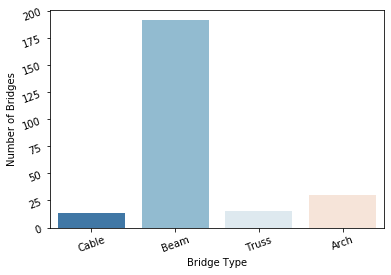

In [61]:
#types of bridges in the dataset.

ds['bridge type'] = ds['bridge type'].replace('I', 'Beam')
ds['bridge type'] = ds['bridge type'].replace('II', 'Truss')
ds['bridge type'] = ds['bridge type'].replace('III', 'Cable')
ds['bridge type'] = ds['bridge type'].replace('IV', 'Arch')

sns_plot = sns.countplot(x='bridge type', data=ds)
plt.tick_params(labelrotation = 20)
plt.ylabel('Number of Bridges')
plt.xlabel('Bridge Type')
figure = sns_plot.get_figure() 
figure.savefig("../Outputs/output3.png", dpi = 1000)

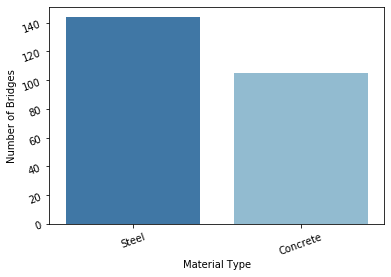

In [62]:
#material type used by bridges.

ds['material type'] = ds['material type'].replace('I', 'Steel')
ds['material type'] = ds['material type'].replace('II', 'Concrete')

sns_plot = sns.countplot(x=ds['material type'])
sns_plot.set(xlabel = 'Material Type', ylabel = 'Number of Bridges')
plt.tick_params(labelrotation = 20)
figure = sns_plot.get_figure() 
figure.savefig("../Outputs/output4.png", dpi = 1000)

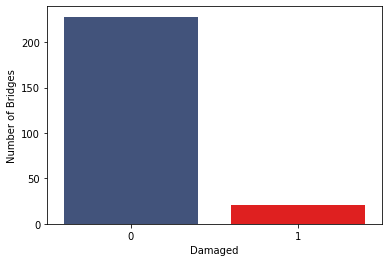

In [63]:
#no of bridges which are damaged.
hue_colors = { 0: "#384f85", 1: "red"}
sns_plot = sns.countplot(x='damaged', data=ds, palette = hue_colors)
plt.ylabel('Number of Bridges')
plt.xlabel('Damaged')
figure = sns_plot.get_figure() 
figure.savefig("../Outputs/output5.png", dpi = 1000)

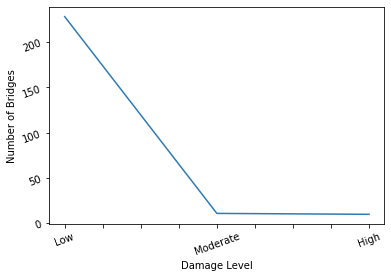

In [64]:
#damage level sustained by the bridges.
ds1 = ds['Damage level'].value_counts()
ds1.plot(kind = 'line')
plt.xlabel('Damage Level')
plt.ylabel('Number of Bridges') 
plt.tick_params(labelrotation = 20)
plt.savefig("../Outputs/output6.png", dpi = 400)